In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv('Survival_Analysis_cancer.csv')
dataset

,Age,Operation_years,Axillary Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [6]:
dataset.head(15)

,Age,Operation_years,Axillary Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [3]:
x=dataset.iloc[:,:3].values
y=dataset.iloc[:,-1].values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [5]:
x_test

array([[67, 63,  1],
       [43, 63, 14],
       [65, 58,  0],
       [58, 61,  1],
       [53, 60,  9],
       [37, 60, 15],
       [60, 65,  0],
       [46, 65, 20],
       [66, 61, 13],
       [63, 62,  0],
       [73, 62,  0],
       [50, 59,  0],
       [52, 66,  4],
       [64, 58,  0],
       [62, 59, 13],
       [61, 59,  0],
       [42, 62, 20],
       [46, 58,  2],
       [54, 66,  0],
       [35, 63,  0],
       [38, 60,  0],
       [53, 59,  3],
       [61, 59,  0],
       [34, 67,  7],
       [47, 66, 12],
       [46, 69,  3],
       [55, 58,  1],
       [51, 59,  1],
       [43, 59,  2],
       [48, 62,  2],
       [57, 69,  0],
       [63, 66,  0],
       [44, 58,  9],
       [53, 58,  4],
       [43, 64,  0],
       [57, 64,  1],
       [61, 65,  0],
       [42, 65,  0],
       [60, 59, 17],
       [36, 69,  0],
       [50, 63, 13],
       [34, 66,  9],
       [50, 64,  0],
       [58, 61,  2],
       [41, 65,  0],
       [47, 66,  0],
       [70, 63,  0],
       [83, 5

In [6]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9, 22],
       [ 9, 37]], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5974025974025974

In [10]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr,tpr)


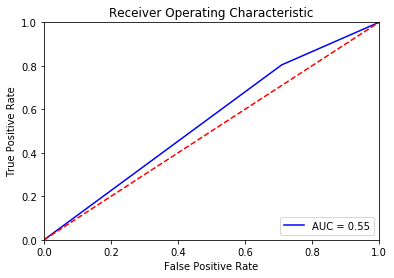

In [11]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
classifier.predict(np.array([[38, 69, 21]]))

array([0], dtype=int64)